# Faltung

Die Faltung zweier Funktion $x(t)$ und $h(t)$ ergibt eine neue Funktion $y(t)$ und wird definiert als das Integral

$$
\int_{-\infty}^\infty x(\tau) h(t-\tau)d\tau := x(t) \ast h(t) =  (x \ast h)(t) = y(t)
$$

oder im diskreten Fall durch 

$$(x * h)(t) = \sum_{k} x(k) h(t - k)$$

Die Faltungsfunktion $h$ wird auch Gewichtsfunktion genannt. Der Name wird deutlich bei der Interpretation als Filtermaske.



# Faltungstheorem

(Herleitung gemäß Fouriertransformation für Fußgänger, Tilman Butz, Springer 2011)

Die Fouriertransformierte der Faltung ergibt

$$
Y(f)=\int_{-\infty}^\infty y(t)  e^{-\imath 2\pi f t} dt 
$$

Einsetzen von $y(t)=\int_{-\infty}^\infty x(\tau) h(t-\tau)d\tau$ liefert 

$$=\int_{-\infty}^\infty \left[\int_{-\infty}^\infty x(\tau) h(t-\tau)   d\tau \right] e^{-\imath 2\pi f t} dt$$

erweitert mit $e^{-\imath 2\pi f \tau}e^{\imath 2\pi f \tau}=1$ 

$$=\int_{-\infty}^\infty x(\tau) e^{-\imath 2\pi f \tau}\left[\int_{-\infty}^\infty  h(t-\tau) e^{-\imath 2\pi f (t- \tau)}   dt  \right]  d\tau $$



mit Variablentransformation $t'=t-\tau$ erhalten wir

$$=\int_{-\infty}^\infty x(\tau) e^{-\imath 2\pi f \tau} H(f)$$

$$Y(f)=X(f) H(f)$$


Aus dem Faltungsintegral $\ast$ wird durch Fouriertransformation ein einfaches Produkt! Dies ist die wichtige Aussage des Faltungstheorems, welche die Implementierung von schnellen Faltungs-Filtern mittels FFT ermöglicht.

$$ y(t)=x(t)\ast h(t) $$

$$ Y(f)=X(f) H(f)$$

Die Korrelation $\int_{-\infty}^\infty x(t) y(t+\tau)d\tau$ ergibt sich analog aus dem Produkt mit der komplex konjugierten Fouriertransformation $X^*(f)Y(f)$.


# Wiener-Chintschin-Theorem 

Das Wiener-Chintschin-Theorem, besagt, dass die spektrale Leistungsdichte eines stationären Zufallsprozesses die Fourier-Transformierte der korrespondierenden Autokorrelationsfunktion ist. Im Falle diskreter Zeitserien hat das Wiener-Chintschin-Theorem die Form:

$$S(f)=\sum_{k} r(k)e^{-\imath 2\pi k f}$$

mit der Autokorrelationsfunktion $r(k)$ und der spektralen Leistungsdichte $S(f)$.

# Parsevalsches Theorem

Die Energie eines Signals im Zeitbereich ist gleich seiner Energie im Frequenzbereich. Für diskrete Zeitserien gilt nach dem Parsevalschen Theorem

$$\sum_{t=0}^{N-1} | x(t) |^2  =  \frac{1}{N} \sum_{f=0}^{N-1} | X(f) |^2$$


# Beispiel: Mittelwertfilter implementiert als Faltung
## Python-Version

Populating the interactive namespace from numpy and matplotlib


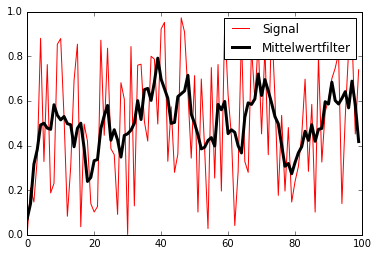

In [1]:
%pylab inline

x=rand(100)
w=5
h=ones(w)/w # Definiere Rechteckmaske mit Fläche=1
y=convolve(x,h,mode='same') # Faltungsoperation
plot(x,'r-',label='Signal')
plot(y,'k-',lw=3,label='Mittelwertfilter')
legend()

# Beispiel Octave Version

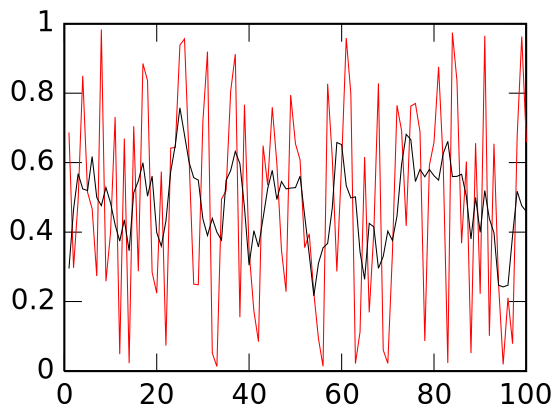

In [18]:
x=rand(100,1);
w=5;
h=ones(w,1)./w; % Definiere Rechteckmaske mit Fläche=1
y=conv(x,h,'SAME'); % Faltungsoperation
plot(x,'r-')
hold();
plot(y,'k-')

# Stochastische Prozesse

## Stochastischer Prozess
Ein stochastischer Prozess ist eine Folge von Zufallsvariablen $x_t$. 

## White-Noise Prozess
Ein White-Noise-Prozess oder reiner Zufallsprozess ist eine identisch verteilte  Zufallsvariable $\epsilon_t$, die unabhängig von vorherigen Zeitschritten $t-\Delta t$ ist.

Beispiel Normalverteilung $\epsilon_t\sim N(\mu,\sigma)$

## Autoregressive Prozesse
Beim autoregressiven Prozess (AR-Prozess) hängt die Zufallsvariable von vorherigen Zeitschritten ab. Im Fall der ersten Ordnung (AR1-Prozess) hängt der Zeitschritt $t$ nur vom vorherigen Zeitschritt $t-1$ ab:

$$x_t=\alpha x_{t-1}+\epsilon_t$$

Der Koeffizient $\alpha$ wird Feedback-Parameter genannt.

## Random-Walk Prozess

Der Spezialfall des AR1-Prozesses mit $\alpha=1$ wird Random Walk oder auch Zufallsbewegung genannt.

$$x_t=x_{t-1}+\epsilon_t$$

## Korrelation und Autokorrelation 

Der Korrelationskoeffizient $r$ zwischen N Beobachtungspaaren zweier Variabler $x$ und $y$ ist gegeben als
$$r(x,y)=\frac{ \sum (x_i-\bar{x})(y_i-\bar{y})  }{ \sqrt{\sum (x_i-\bar{x})^2 \sum (y_i-\bar{y})^2} }$$

Die Autokorrelation $r(x,l)$ ist die Korrelation der Zeitserie $x_t$ mit der um die Distanz (Lag) $l$ verschobenen gleichen Zeitreihe $x_{t+l}$. Besondere Bedeutung hat der Autokorrelationskoeffizient für $l=1$. 

## Filter 

### Lineare Filter

Ein linearer Filter $L$ transformiert eine Zeitreihe $x_t$ in einer andere Zeitreihe $y_t$ mittels der Berechnung

$$y_t=\sum_i a_i x_{t-i}$$
$$y_t= L x_t$$
Die Folge der Koeffizienten ($a_i$) des linearen Filteroperators $L$ wird auch als Impulsantwortfunktion bezeichnet.

### Gleitender Mittelwert

Der gleitende Mittelwert oder auch Moving Average (MA) berechnet sich aus

$$y_t=\frac{1}{3}(x_{t-1}+x_t+x_{t+1})$$

Die sogenannte Fensterlänge (Window Size) beträgt in diesem Fall $W=3$ (Anzahl der Koeffizienten).

### Kausale Filter 

Wenn das Filter nur von seinen gegenwärtigen und vergangenen Eingangswerten abhängt, wird es kausales Filter genannt.

Das Mittelwertfilter $y_t=\frac{1}{3}(x_{t-1}+x_t+x_{t+1})$ ist nicht-kausal, da der gegenwärtige Ausgangswert $y_t$ vom zukünftigen Eingangswert $x_{t+1}$ abhängt.


## Stationarität

Die Funktionen Mittelwert $\mu(t)=E[x_t]$, Varianz $\sigma^2(t)=Var[x_t]$ und Kovarianz $\gamma(s,t)=Cov[x_s,x_t]$ seien jeweils über einen endlichen Fensterbereich $W$ zu berechnen. 

Die stochastische Zeitreihe $x_t$ wird mittelwert-  bzw. varianzstationär genannt, wenn der Mittelwert $\mu(t)$ bzw. die Varianz $\sigma^2(t)$ zeitlich konstant ist. Die Zeitreihe heißt kovarianzstationär, wenn $\gamma(s,t)$ nur von $s-t$ abhängt. Ist eine Zeitreihe mittelwert-, varianz und kovarianzstationär, so wird sie schwach stationär genannt. 


# AR1-Spektrum

Das korrespondierende Spektrum $G(\omega)$  (spektrale Dichte) eines Markov-Prozesses erster Ordnung ist gegeben als (Jenkins und Watts, 1968)

$$G(\omega)=\frac{F}{1+\alpha^2-2\alpha \cos(\omega \Delta)}$$

mit der Frequenz $\omega$ und der (konstanten) spektralen Energiedichte $F$ des Rauschantriebs.


# Beispiele

## Stochastische Prozesse


Populating the interactive namespace from numpy and matplotlib


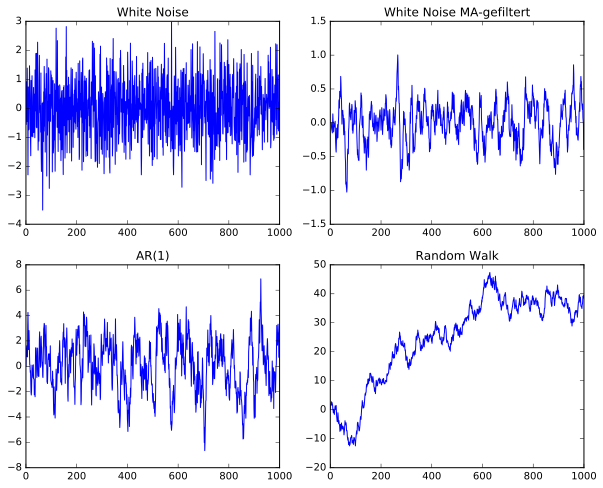

In [24]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

def AR1(N,a,b):
    Y=zeros(N)
    for i in range(1,N):
        Y[i]=Y[i-1]*a+b*randn(1)
    return Y

def MA_filter(Y,v):
    Y_in=Y
    Y=Y.copy()
    for i in range(1,N-1):
        Y[i]=1.0/(2*v+1)*(sum(Y_in[i-v:i+v+1]))
    return Y


N=1000
Y_white_noise=AR1(N,0,1)
Y_L=MA_filter(Y_white_noise,5)
Y_AR1=AR1(N,0.9,1)
Y_random_walk=AR1(N,1.0,1)

#####################################
figure(figsize=(10,8))
subplot(2,2,1)
plot(Y_white_noise)
title('White Noise')
subplot(2,2,2)
plot(Y_L)
title('White Noise MA-gefiltert')
subplot(2,2,3)
plot(Y_AR1)
title('AR(1)')
subplot(2,2,4)
plot(Y_random_walk)
title('Random Walk')


## MA-Filter



[0, 100, -3, 3]

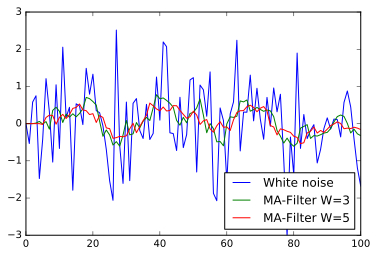

In [25]:
N=1000
Y_white_noise=AR1(N,0,1)
Y_L_W3=MA_filter(Y_white_noise,3)
Y_L_W5=MA_filter(Y_white_noise,5)

plot(Y_white_noise,label='White noise')
plot(Y_L_W3,label='MA-Filter W=3')
plot(Y_L_W5,label='MA-Filter W=5')
legend(loc=4)
axis([0,100,-3,3])

## Autokorrelation

In [26]:
def korrelation(x,y):
    mx=mean(x)
    my=mean(y)
    return sum( (x-mx)*(y-my) )/sqrt(sum( (x-mx)**2)* sum((y-my)**2) )

print(korrelation(Y_white_noise,Y_L_W3))
print(korrelation(Y_white_noise,Y_white_noise))
print(korrelation(Y_L,Y_AR1))


0.347522360468
1.0
-0.019946912798


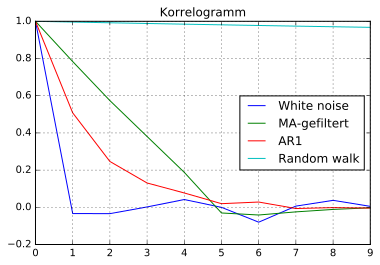

In [6]:
def autokorrelation(x,l):
    r=ones(l)
    for i in range(1,l):
        x1=x[i:]
        x2=x[:-i]
        r[i]=korrelation(x1,x2)
    return r
L=10
plot(autokorrelation(Y_white_noise,L),label='White noise')
plot(autokorrelation(Y_L_W5,L),label='MA-gefiltert')
plot(autokorrelation(Y_AR1,L),label='AR1')
plot(autokorrelation(Y_random_walk,L),label='Random walk')
legend(loc='center right')
grid()
title('Korrelogramm')


## Vorsicht bei Autokorrelationen!

Weisen die Daten Autokorrelationen auf, sind sie nicht mehr unabhängig! Die Anzahl der Freiheitsgrade reduziert sich. Dies muss bei der Hypothesentests berücksichtigt werden. 

Siehe Matlab-Skript corr2.m von Ian Eisenmann http://eisenman.ucsd.edu/

    % Linear correlation (RHO) between X and Y in which the p-value (PVAL)
    % accounts for autocorrelation in both records by using AR(1) processes as
    % the null hypothesis rather than white noise as in the standard corr()
    % function. Uses common method for estimating effective degrees of freedom
    % in autocorrelated data (Bartlett, J. Roy. Stat. Soc. 98, 536-543, 1935;
    % Mitchell et al., Climatic Change, WMO Technical Note 79, 1966; Bretherton
    % et al., J. Climate 12, 1990-2009, 1999). 

# Beispiel AR1-Spektrum

Populating the interactive namespace from numpy and matplotlib


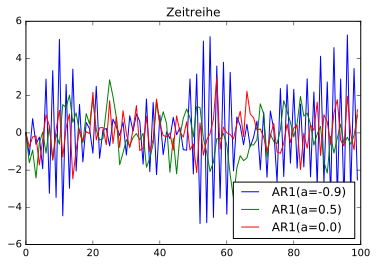

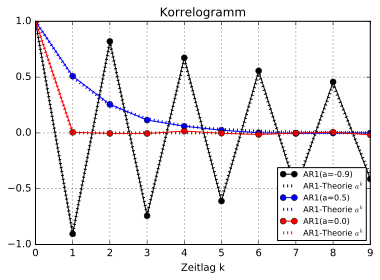

In [27]:
%pylab inline
%config InlineBackend.figure_format = 'svg'


close('all')

figure(1)
figure(2)
N=10000
L=10
k=arange(0,L)
b=1.0
an=[-0.9,0.5,0.0]
Na=len(an)
Ya=zeros((Na,N))

c='kbrcy'
for i,a in enumerate(an):
    Y=AR1(N,a,b)
    Ya[i]=Y
    figure(1)
    plot(Y[0:100],label='AR1(a='+str(a)+') ')
    figure(2)
    plot(k,autokorrelation(Y,L),'o-',label='AR1(a='+str(a)+') ',color=c[i])
    plot(k,a**k,':',lw=3,label='AR1-Theorie $a^k$',color=c[i])
figure(1)
legend(loc='lower right')
title('Zeitreihe')
figure(2)
legend(loc='lower right',fontsize=8)
title('Korrelogramm')
xlabel('Zeitlag k')
grid()



(0.00390625, 1.0, 0.098249035829564429, 151.96640043431412)

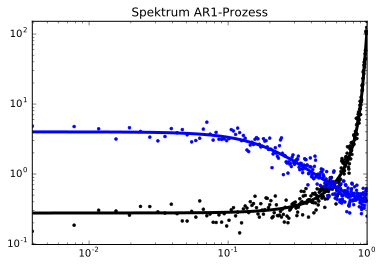

In [29]:
def AR1_Spektrum(a,F,f):
    G=F/(1+a**2-2*a*cos(f*pi))
    return G

figure()
Pxx1,freqs=psd(Ya[0],NFFT=512)
Pxx2,freqs=psd(Ya[1],NFFT=512)

close()

G1=AR1_Spektrum(an[0],b**2,freqs)
loglog(freqs,G1,'-',linewidth=3,color=c[0])
loglog(freqs,Pxx1,'.',color=c[0])

G2=AR1_Spektrum(an[1],b**2,freqs)
loglog(freqs,G2,'-',linewidth=3,color=c[1])
loglog(freqs,Pxx2,'.',color=c[1])


title('Spektrum AR1-Prozess')
axis('tight')


# Beispiel: Spektrum der Lufttemperatur-Anomalie

Wir verwenden meteorologische Daten vom Deutschen Wetterdienst, aus welchen wir zuvor Wochenmittelwerte und Anomalien berechnet haben, siehe [Beispiel aus Stunde 3](https://nbviewer.jupyter.org/github/LarsKaleschke/Zeitreihenanalyse/blob/master/stunde3/Pandas-Zeitserien-DWD-Beispieldaten.ipynb)

Fragestellung: Wir gut können die Anomalien durch einen AR1-Prozess repräsentiert werden?

## Python-Version

In [1]:
%pylab inline
import pandas as pd
DF=pd.read_csv('Anomalien.csv',parse_dates=[0])
DF.head()

Populating the interactive namespace from numpy and matplotlib


,Datum,Wochenmittel,Jahresgang,Anomalie
0,1891-01-01,-10.700000,0.881145,-11.581145
1,1891-01-08,-6.485714,0.648434,-7.134148
2,1891-01-15,-4.957143,0.543115,-5.500258
3,1891-01-22,-6.042857,0.566787,-6.609644
4,1891-01-29,1.785714,0.719091,1.066623


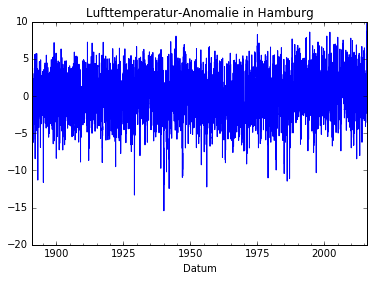

In [2]:
TA=pd.Series(DF['Anomalie'].data,index=DF['Datum'])
TA.plot()
title('Lufttemperatur-Anomalie in Hamburg')

## Korrelogramm

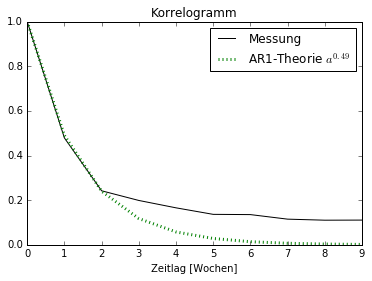

In [3]:
def korrelation(x,y):
    mx=mean(x)
    my=mean(y)
    return sum( (x-mx)*(y-my) )/sqrt(sum( (x-mx)**2)* sum((y-my)**2) )
def autokorrelation(x,l):
    r=ones(l)
    for i in range(1,l):
        x1=x[i:]
        x2=x[:-i]
        r[i]=korrelation(x1,x2)
    return r
L=10
k=arange(0,L)
AK=autokorrelation(TA.data,L)
plot(k,AK,'k-',label='Messung')
a=0.49
plot(k,a**k,'g:',lw=3,label='AR1-Theorie $a^{'+str(a)+'}$')
xlabel('Zeitlag [Wochen]')
title('Korrelogramm')
legend()

## Spektrum

(1.0, 128.0, 1.4151486616128028, 60.782831024320878)

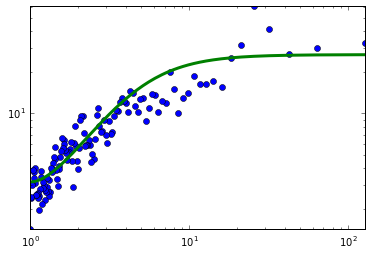

In [5]:
def AR1_Spektrum(a,F,f):
    G=F/(1+a**2-2*a*cos(f*pi))
    return G

figure()
Pxx1,freqs=psd(TA.data)
close()
G1=AR1_Spektrum(0.49,7,freqs)
T=1/freqs
#loglog(freqs,Pxx1,'o')
#loglog(freqs,G1,'-',linewidth=3)
loglog(T,Pxx1,'o')
loglog(T,G1,'-',linewidth=3)

axis('tight')

## Octave Beispiele

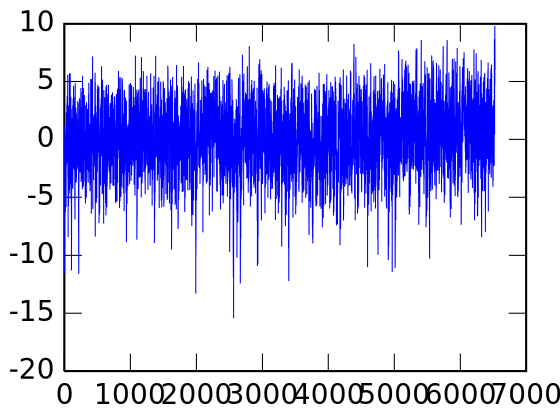

In [2]:
TAB=csvread('Anomalien.csv');
y=transpose(TAB(:,4));
plot(y)

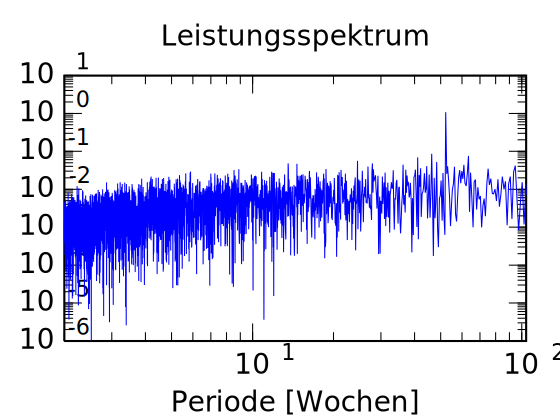

In [3]:
fa = 1.0; % Abtast-Frequenz

Y = fft(y);
N = size(y)(2)/2+1;
X = linspace(0, fa/2, N);

T=1./X;
figure();
Amp=abs(Y(1,1:N)/N);
loglog(T,Amp.^2);

xlabel('Periode [Wochen]');
ylim([1e-6,10]);
xlim([2,104]);
title('Leistungsspektrum')